# Lecture 27

This lecture solves reactor design problems involving semi-batch reactors; membrane reactors; recycle reactors, and packed beds with pressure drops.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Recap

To this point, we have seen that the strategy of decreasing pressure and adding a diluent presented above will work, but it requires a reactor volume of roughly 28,000L. We also see that we can get away with a relatively small reactor ***if*** we also invest in separations and recycle. Let's see if we can do better than this using a membrane reactor.  

## Example Problem 01

We'll carry out propane dehydrogenation in a membrane reactor. Specifically we design the reactor such that there is an internal tube where we feed pure propane at 8.2 atm and a flowrate of 10 moles per minute. This internal tube is surrounded by an external tube into which we feed N2 at 1 atm and a very high flowrate. The walls of the inner tube are made from a specialized membrane that will allow H2 diffusion across the membrane--in this configuration, the pressure of H2 inside the inner reactor is always higher than the pressure of H2 in the annulus, so H2 will diffuse out of the reactor and into the annulus where it is instantly diluted by N2 to a concentration (partial pressure) of zero. Since we're removing a product, we don't need to feed a diluent or reduce pressure to achieve the desired 95\% conversion of propane.  
		
Rate and equilibrium constants remain the same because we haven't changed the temperature. We are additionally given a lumped mass transfer coefficient that describes the rate of H2 diffusion across the membrane.
		
\begin{align}
    k_f  &= 0.7  \ \textrm{min}^{-1} \\
    K_C &= 0.05 \ \textrm{mol} \ \textrm{L}^{-1}\\
    k_{C_C}a &= 0.2 \ \textrm{min}^{-1}				
\end{align}			

How large does this membrane reactor need to be to achieve 95\% conversion of propane?

## Membrane Reactors

Recall how we originally developed the PFR balance by considering a single cross sectional element with a volume of $\Delta V$. In the case of a simple PFR, we assume that inside of that cross section, everything is well-mixed, so we know that it has a uniform Temperature, Pressure, Composition (and therefore reaction rate).  So, within that well-mixed cross section, the rate of generation or consumption by chemical reaction, $G_j$, is given by:

$$G_j = R_j\Delta V$$

If the PFR is operating at steady state, we can write a balance on that well-mixed cross section:

$$ 0 = F_j\big|_V - F_j\big|_{V+\Delta V} + R_j \Delta V$$

Next, we divide the whole equation by $\Delta V$:

$$ 0 = \frac{F_j\big|_V - F_j\big|_{V+\Delta V}}{\Delta V} + R_j$$

And we now assume we have an infinite number of cross sections and let the volume of each cross section approach zero, i.e., $\Delta V \longrightarrow 0$.  You may recognize this as the definition of a derivative from your first semester calculus course.  This gives:

$$ 0 = -\frac{dF_j}{dV} + R_j$$

In PFR analysis, we typically rearrange this equation to get:

$$\frac{dF_j}{dV} = R_j$$

## Modifying the PFR balance to model a membrane reactor

When we have a membrane reactor, we modify the PFR balance slightly to allow that species $j$ can diffuse into or out of the well-mixed volume element, $\Delta V$.  We define the rate of diffusion across the membrane per unit volume of reactor as:

$$\bar{R}_j = W_ja$$

Where $W_j$ is the flux of species $j$ across the membrane and $a$ is the ratio of surface area to volume for that membrane.  

### Units in the Membrane Reactor Balance

We need to briefly discuss dimensions.  $\bar{R_j}$ will have the same units as our intensive reaction rates, $r_i$ and our intensive species production rates, $R_j$.  For example:

$$\bar{R}_j \ [=]\ \mathrm{\frac{mol}{m^3 \, s}}$$

We recall from heat and mass transfer that fluxes have units of moles per area per time; for example:

$$W_j \ [=] \ \mathrm{\frac{mol}{m^2 \, s}}$$

And the surface area to volume ratio, $a$ will have units of area per volume, which reduces to inverse length, for example:

$$a = \mathrm{\frac{Area}{Volume}} \ [=] \ \frac{m^2}{m^3} \ [=] \ \frac{1}{m}$$

With these definitions and unit conventions in mind, we see that the product of $W_j a$ gives the correct units on $\bar{R}_j$:

$$\bar{R}_j = W_ja \ [=] \ \mathrm{\frac{mol}{m^2 \, s}} \ \frac{1}{m} \ [=] \ \mathrm{\frac{mol}{m^3 \, s}}$$

### The steady state balance on a well-mixed volume element in a membrane reactor

With the above in mind, we can write the following balance to describe flow in, flow out, and reaction into the well-mixed volume element, $\Delta V$:

$$ 0 = F_j\big|_V - F_j\big|_{V+\Delta V} + R_j \Delta V + \bar{R}_j \Delta V$$

Dividing the equation through by $\Delta V$ and allowing $\Delta V \rightarrow \infty$ gives the membrane reactor balance:

$$\frac{dF_j}{dV} = R_j + \bar{R}_j$$

### Defining the diffusion rate

Now that we have a general balance, the only thing that remains is to express the diffusion rate in terms of species concentrations (or partial pressures) similar to the way we have always expressed intensive production rates in terms of species concentrations (or partial pressures).  From heat and mass, we recall that flux across a boundary can be calculated as:

$$W_j = k_{C_j}(C_{j_s} - C_j)$$

In the context of the membrane reactor, consistent with sign conventions on flowrates and production rates, we define flux *into* the reactor as positive and *out of* the reactor as negative. $k_{C_j}$ is a mass transfer coefficient for species $j$; $C_{j_s}$ is the concentration of species $j$ in the annular *space* surrounding the inner reactor tube, and $C_j$ is the concentration of species $j$ inside of the reactor.

We can see that in cases where $C_j > C_{j_s}$, diffusion will occur from the reactor to the annulus and have a negative sign.  Mass transfer coefficients always have units of length-per-time, thus the product of $k_{C_j}$ and concentration gives a flux in the correct units of moles per area per time.

For a cylinder such as this membrane reactor, the ratio of area to volume is:

$$a = \frac{2 \pi r L}{\pi r^2 L} = \frac{2}{r}$$

Ultimately, we can define the rate of diffusion across the membrane as:

$$\bar{R}_j = k_{C_j}a(C_{j_s} - C_j)$$

And we note that the product $k_{C_j}a$ is frequently lumped and given in problem statements (such as this one).

### Solution to Example Problem 01

With the above derivations for membrane reactor balances in mind, we can write material balances for all 3 species in this reactor:

\begin{align}
    \frac{dF_A}{dV} &= R_A \\
    \frac{dF_B}{dV} &= R_B \\
    \frac{dF_C}{dV} &= R_C + \bar{R}_C\\
\end{align}

Next, we begin the usual steps of defining the right hand side of each ODE in terms of parameters, state variables, and the independent variable (V):

\begin{align}
    R_A &= -r \\
    R_B &=  r \\
    R_C &=  r 
\end{align}

We know that this reaction has elementary kinetics so:

$$r = k_fC_A - k_rC_BC_C$$

Concentrations can be defined in terms of flowrates:

\begin{align}
    R_A &= F_A/Q \\
    R_B &= F_B/Q \\
    R_C &= F_C/Q 
\end{align}

Where:

$$Q = \frac{F_T R T}{P}$$

And:

$$F_T = F_A + F_B + F_C$$

Finally:

$$\bar{R}_j = k_{C_C}a(C_{C_s} - C_C)$$

The lumped mass transfer coefficient/area product is given in the problem statement, and we can assume that the concentration of C in the annular space is zero due to the large excess of N2 in the annulus.  With that, we can solve the problem using `solve_ivp()`.

In [7]:
kf  = 0.7  #1/min
KC  = 0.05 #mol/L
kr  = kf/KC #L/mol/min
kca = 0.2 #1/min
CCs = 0.0
T   = 500 #K
P   = 8.2 #atm
R   = 0.08206 #L*atm/mol/K
FAf = 10.0 #mol/min
FBf = 0.0
FCf = 0.0
XA_target = 0.95

In [8]:
def P01(V, var, par):
    FA, FB, FC = var
    kf, kr, T, P, R, kca, CCs = par
    
    FT = FA + FB + FC
    
    Q  = FT*R*T/P
    
    CA = FA/Q
    CB = FB/Q
    CC = FC/Q
    
    r  = kf*CA - kr*CB*CC
    
    RA = -r
    RB =  r
    RC =  r
    
    RCbar = kca*(CCs - CC)
    
    dA = RA
    dB = RB
    dC = RC + RCbar
    
    return [dA, dB, dC]

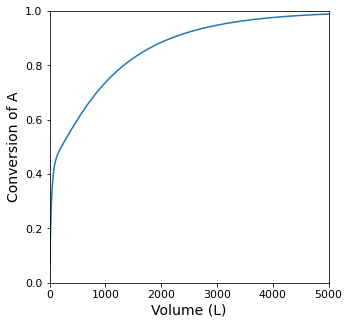

In [9]:
#Vspan = (0.0, 100.0)
Vspan = (0.0, 5000.0)
var0  = (FAf, FBf, FCf)
par0  = (kf, kr, T, P, R, kca, CCs)
ans2  = solve_ivp(P01, Vspan, var0, args = (par0, ), atol = 1e-8, rtol =  1e-8)

V     = ans2.t
FA    = ans2.y[0, :]
FB    = ans2.y[1, :]
FC    = ans2.y[2, :]

XA    = (FAf - FA)/FAf

plt.figure(1, figsize = (5, 5))
plt.plot(V, XA)
plt.xlim(0.0, max(Vspan))
plt.xticks(fontsize = 11)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylim(0.0, 1.0)
plt.yticks(fontsize = 11)
plt.ylabel('Conversion of A', fontsize = 14)
plt.show(1)

In [11]:
itp1 = interp1d(XA, V, kind = 'cubic')
Vopt = itp1(XA_target)
print(f'The Volume required for XA = {XA_target:0.2f} is {Vopt:0.0f}L')

The Volume required for XA = 0.95 is 3054L


## Example Problem 02

Now let's consider packed bed reactor performance.  For this problem, we'll carry out ethylene hydrogenation (reaction 1). A side reaction, ethylene dimerization (reaction 2) also occurs under these conditions. Overall reactions for each are given below.

\begin{align*}
    C_2H_4 + H_2 \longrightarrow C_2H_6 \\
    2C_2H_4 \longrightarrow C_4H_8			
\end{align*}			

Both reactions occur in the gas phase, and each has an elementary rate law.  Additional parameters and operating conditions are specified below.

\begin{align*}
    k_1  &= 10 \ \textrm{L}^{2} \ \textrm{mol}^{-1} \ \textrm{kg}^{-1} \ \textrm{sec}^{-1} \\
    k_2  &= 1 \ \textrm{L}^{2} \ \textrm{mol}^{-1} \ \textrm{kg}^{-1} \ \textrm{sec}^{-1} \\
    F_{A_f} &= 100 \ \textrm{mol} \ \textrm{sec}^{-1} \\				
    F_{B_f} &= 100 \ \textrm{mol} \ \textrm{sec}^{-1} \\
    T &= 573 \ \textrm{K} \\
    P &= 10 \ \textrm{bar}
\end{align*}			

If the reactor operates isobarically, calculate the mass of catalyst required to achieve an ethylene conversion of 70\%.

In [17]:
def P02(W, var, par):
    FA, FB, FC, FD = var #all flowrates in mol/s
    
    #Operating conditions/fixed values
    P, R, T, k1, k2 = par   

    #Total molar flowrate
    FT = FA + FB + FC + FD
    
    #Volumetric flowrate
    Q = FT*R*T/P       #vol flow rate, L/sec

    CA = FA/Q          #Concentration of A, mol/L
    CB = FB/Q          #Concentration of B, mol/L
    CC = FC/Q          #Concentration of C, mol/L
    CD = FD/Q          #Concentration of D, mol/L

    r1 = k1*CA*CB      #Rate of reaction 1, mol/kg/sec
    r2 = k2*CA**2       #Rate of reaction 2, mol/kg/sec

    RA = -r1 - 2*r2
    RB = -r1
    RC =  r1
    RD =  r2

    dFAdW = RA
    dFBdW = RB
    dFCdW = RC
    dFDdW = RD
    return [dFAdW, dFBdW, dFCdW, dFDdW]

In [31]:
FAf = 100        #mol/s
FBf = 100        #mol/s
FCf = 0          #mol/s
FDf = 0          #mol/s
P   = 1.0e6   #Pa, 10 bar
R   = 8314       #L*Pa/mol/K
T   = 573        #K
k1  = 10         #L^2/mol/kg/sec
k2  = 1          #L^2/mol/kg/sec

XA_target = 0.7
var0 = (FAf, FBf, FCf, FDf)
par0 = (P, R, T, k1, k2)
wspan = (0, 2500)
ans02 = solve_ivp(P02, wspan, var0, args = (par0, ), atol = 1e-8, rtol = 1e-8)

W   = ans02.t
FA  = ans02.y[0, :]
XA  = (FAf - FA)/FAf
itp = interp1d(XA, W, kind = 'cubic')

print(f'The mass of catalyst required to achieve XA = {XA_target:0.2f} is W = {itp(XA_target):0.0f} kg') 

The mass of catalyst required to achieve XA = 0.70 is W = 957 kg


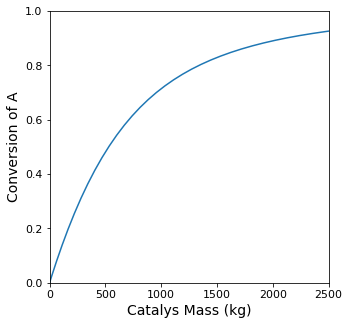

In [32]:
plt.figure(1, figsize = (5, 5))
plt.plot(W, XA)
plt.xlim(0.0, max(wspan))
plt.xticks(fontsize = 11)
plt.xlabel('Catalys Mass (kg)', fontsize = 14)
plt.ylim(0.0, 1.0)
plt.yticks(fontsize = 11)
plt.ylabel('Conversion of A', fontsize = 14)
plt.show(1)


## Example Problem 03

The packed bed reactor described in Example Problem 02 above is no longer isobaric. Assume that the pressure gradient in the packed bed can be modeled using the Ergun equation.  For this example, we are given the lumped Ergun Equation parameter as:
	
$$\frac{\beta}{A_c\rho_b} = 303.975 \ \textrm{Pa} \ \mathrm{kg^{-1}}$$
	
Calculate the mass of catalyst required to achieve an ethylene conversion of 70\%.

### Solution to Example Problem 03

For this, we develop the material balances on all species as in Example 02, but we add a fifth differential equation (the Ergun Equation) to model the change in pressure as a function of increasing catalyst mass.

In [40]:
def P03(W, var, par):
    FA, FB, FC, FD, P = var #all flowrates in mol/s
    
    #Operating conditions/fixed values
    R, T, k1, k2, Ergun, Qf = par   

    #Total molar flowrate
    FT = FA + FB + FC + FD
    
    #Volumetric flowrate
    Q = FT*R*T/P       #vol flow rate, L/sec

    CA = FA/Q          #Concentration of A, mol/L
    CB = FB/Q          #Concentration of B, mol/L
    CC = FC/Q          #Concentration of C, mol/L
    CD = FD/Q          #Concentration of D, mol/L

    r1 = k1*CA*CB      #Rate of reaction 1, mol/kg/sec
    r2 = k2*CA**2       #Rate of reaction 2, mol/kg/sec

    RA = -r1 - 2*r2
    RB = -r1
    RC =  r1
    RD =  r2

    dFAdW = RA
    dFBdW = RB
    dFCdW = RC
    dFDdW = RD
    dPdW  = -Ergun*Q/Qf
    return [dFAdW, dFBdW, dFCdW, dFDdW, dPdW]

In [43]:
FAf = 100        #mol/s
FBf = 100        #mol/s
FCf = 0          #mol/s
FDf = 0          #mol/s
FTf = FAf + FBf + FCf + FDf
Pf  = 1.0e6   #Pa, 10 bar
R   = 8314       #L*Pa/mol/K
T   = 573        #K
Qf  = FTf*R*T/Pf
k1  = 10         #L^2/mol/kg/sec
k2  = 1          #L^2/mol/kg/sec
Ergun = 303.975  #Pa/kg

XA_target = 0.7
var0 = (FAf, FBf, FCf, FDf, Pf)
par0 = (R, T, k1, k2, Ergun, Qf)
wspan = (0, 2000)
ans03 = solve_ivp(P03, wspan, var0, args = (par0, ), atol = 1e-8, rtol = 1e-8)

W   = ans03.t
FA  = ans03.y[0, :]
XA  = (FAf - FA)/FAf
itp = interp1d(XA, W, kind = 'cubic')

print(f'The mass of catalyst required to achieve XA = {XA_target:0.2f} is W = {itp(XA_target):0.0f} kg') 

The mass of catalyst required to achieve XA = 0.70 is W = 1581 kg


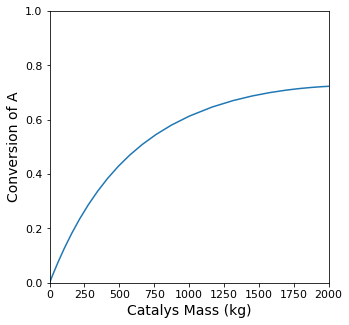

In [44]:
plt.figure(1, figsize = (5, 5))
plt.plot(W, XA)
plt.xlim(0.0, max(wspan))
plt.xticks(fontsize = 11)
plt.xlabel('Catalys Mass (kg)', fontsize = 14)
plt.ylim(0.0, 1.0)
plt.yticks(fontsize = 11)
plt.ylabel('Conversion of A', fontsize = 14)
plt.show(1)